In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPool2D
from keras.layers.core import Flatten

In [28]:
data_set = np.loadtxt('dataset2.csv', delimiter=',', dtype=np.uint8)

In [29]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(data_set.shape[0],900)

In [30]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
# X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
# X_test = X_test.astype('float32')
X_test = X_test/255

In [31]:
classes_num = 10

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

Отображаем часть картинок с номерами классов.

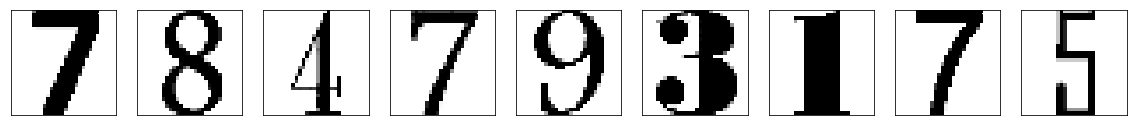

In [32]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,30,30))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='white', size='x-large')

In [33]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), input_shape=(30,30,1), activation=K.relu, data_format='channels_last', kernel_constraint=max_norm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(32, (3,3), activation=K.relu, data_format='channels_last', kernel_constraint=max_norm(3)))
cnn_model.add(MaxPool2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation=K.relu, kernel_constraint=max_norm(3)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation=K.softmax))

epochs = 10
lrate = 0.01
decay = lrate/epochs

optimizer = SGD(lr=lrate ,momentum=0.9, decay=decay)
cnn_model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn_model.fit(X_train.reshape(X_train.shape[0], 30, 30, 1), Y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 1222 samples, validate on 306 samples
Epoch 1/10
1222/1222 [==============================] - 6s - loss: 1.8150 - acc: 0.3699 - val_loss: 0.7474 - val_acc: 0.9314
Epoch 2/10
1222/1222 [==============================] - 6s - loss: 0.4598 - acc: 0.8494 - val_loss: 0.1989 - val_acc: 0.9412
Epoch 3/10
1222/1222 [==============================] - 6s - loss: 0.1734 - acc: 0.9386 - val_loss: 0.0653 - val_acc: 0.9902
Epoch 4/10
1222/1222 [==============================] - 6s - loss: 0.0826 - acc: 0.9779 - val_loss: 0.0420 - val_acc: 0.9902
Epoch 5/10
1222/1222 [==============================] - 8s - loss: 0.0689 - acc: 0.9812 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 6/10
1222/1222 [==============================] - 6s - loss: 0.1008 - acc: 0.9722 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 7/10
1222/1222 [==============================] - 9s - loss: 0.0243 - acc: 0.9935 - val_loss: 0.0108 - val_acc: 0.9967
Epoch 8/10
1222/1222 [==============================] - 8s - loss: 0.0157 - ac

In [35]:
(loss, score) = cnn_model.evaluate(X_test.reshape(X_test.shape[0], 30, 30, 1), Y_test)
print(loss, score)

640/655 [============================>.] - ETA: 0s0.00324734792696 1.0


In [36]:
model_prediction = cnn_model.predict_classes(X_test.reshape(X_test.shape[0], 30, 30, 1))
true_classes = np.argmax(Y_test, 1)
error_indexes = np.argwhere(model_prediction - true_classes)

655/655 [==============================] - 1s     


In [37]:
n_errors = len(error_indexes)
images_n_to_display = n_errors if n_errors < 9 else 9

image_indexes = error_indexes[:images_n_to_display].reshape(images_n_to_display)

sample_images = X_test[image_indexes].reshape((images_n_to_display,30,30))

if n_errors != 1 and n_errors != 0:
    fig, axes = plt.subplots(ncols=images_n_to_display)
    fig.set_figwidth(20)
    
    for i in range(images_n_to_display):
        axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        axes[i].text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
        axes[i].text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')
        
elif n_errors == 1:
    plt.imshow(sample_images[0], cmap=plt.cm.binary_r)
    plt.text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
    plt.text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')

In [39]:
cnn_model.save('classifier_cnn.h5')

In [43]:
X_train.shape

(1528, 900)